In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

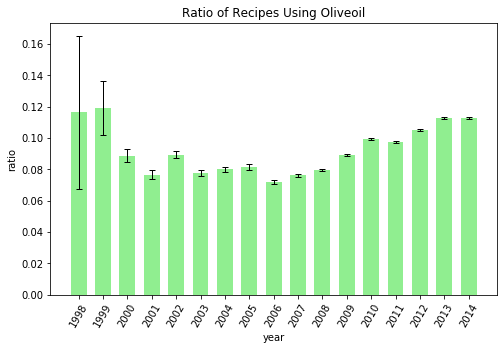

In [2]:
def mokomichi(col_names, year):
    """
    各年のオリーブオイルを使ったレシピの割合とその標準誤差を取得する。
    """

    ratio = []
    se = []
    total_recipe = []
    total_user = []
    for i in year:
        df = pd.read_csv(f"ingredient{i}.csv", names=col_names)
        n = len(pd.unique(df['ID']))
        df[["ingredient", "amount"]] = df[["ingredient", "amount"]].fillna("non_data")
        count = 0
        for j in range(len(df)):
            if ("オリーブオイル" in df["ingredient"][j]) or ("おりーぶおいる" in df["ingredient"][j]) or ("オリーブ油" in df["ingredient"][j]):
                count += 1
        p = count / n
        total_recipe.append(count)
        total_user.append(n)
        ratio.append(p)
        se.append(np.sqrt(p*(1-p)/n))
    return ratio, se, total_recipe, total_user

def show(year, ratio, se):
    """
    各年のオリーブオイルを使ったレシピの割合とその標準誤差を視覚化する。
    """

    error_bar_set = dict(lw = 1, capthick = 1, capsize = 3)
    fig = plt.figure(figsize=(8.0, 5.0))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(year, ratio, color="lightgreen",tick_label=year, yerr=se, ecolor="black", error_kw=error_bar_set, width=0.65)
    ax.set_xticklabels(year, rotation=60)
    ax.set_title("Ratio of Recipes Using Oliveoil")
    ax.set_xlabel("year")
    ax.set_ylabel("ratio")
    plt.show()



col_names = ["ID", "ingredient", "amount"]
year = []
for i in range(1998, 2015):
    year.append(i)

ratio, se, total_recipe, total_user = mokomichi(col_names, year)
show(year, ratio, se)

In [7]:
total_user

[43,
 352,
 4492,
 9820,
 13089,
 19887,
 21265,
 23826,
 47211,
 106843,
 144523,
 204321,
 219545,
 200218,
 252136,
 235483,
 212157]

In [17]:
total_user_adjusted = [n/(max(total_user)/0.16) for n in total_user]

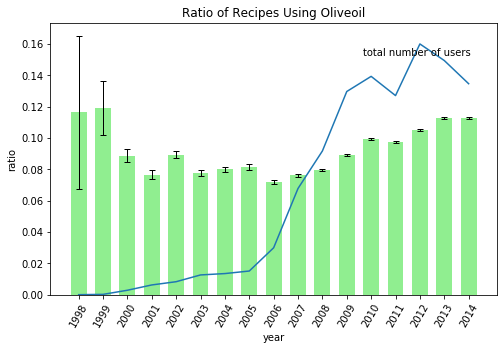

In [29]:
error_bar_set = dict(lw = 1, capthick = 1, capsize = 3)
fig = plt.figure(figsize=(8.0, 5.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot(year, total_user_adjusted)
ax.bar(year, ratio, color="lightgreen",tick_label=year, yerr=se, ecolor="black", error_kw=error_bar_set, width=0.65)
ax.set_xticklabels(year, rotation=60)
ax.set_title("Ratio of Recipes Using Oliveoil")
ax.text(0.70, 0.88, "total number of users", size = 10, transform=ax.transAxes)
ax.set_xlabel("year")
ax.set_ylabel("ratio")
plt.savefig("mokomichi_2.png")

In [11]:
a = [2, 3, 3, 1]

TypeError: unsupported operand type(s) for /: 'list' and 'int'